# Stock Market Prediction using Numerical and Textual Analysis

### Author: Hassan Ikram

### Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines 

In this task, we are going to analyze and predict stock price of BSE SENSEX, which  is a free-float market-weighted stock market index of 30 well-established and financially sound companies listed on Bombay Stock Exchange.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime

# For Sentiment Analysis
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from textblob import TextBlob
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Project is divided into two parts
1. **Textual Analysis / Sentiment Analysis:**
 We are going to use data from  https://bit.ly/36fFPI6, which a Times of India News dataset for sentiment analysis.

2. **Stock Market Prediction:** 
  For Numerical Analysis, we are going to get data from https://finance.yahoo.com/, In numerical analysis we are going to analyze BSE SENSEX stock and then add the sentiment analysis score into historical data for stock closing price prediction.

## Textual Analysis

In [2]:
df = pd.read_csv('india-news-headlines.csv')
df.head()


,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [3]:
## Checking the datatype and length of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [4]:
## Changing the publish_date into standard data and time format
df['date'] = pd.to_datetime(df['publish_date'],format= '%Y%m%d')

In [5]:
## Using the data on from 2011 and onward
df = df[(df['date'] > "2011-01-01")]

In [6]:
# Making a copy of the dataframe to make changes into it.
df_news = df.copy()
df_news

,publish_date,headline_category,headline_text,date
1024407,20110102,tech.computing,Technology wishlist for 2011,2011-01-02
1024408,20110102,city.patna,Air passengers a harassed lot,2011-01-02
1024409,20110102,entertainment.events.bangalore,Bangalore's chilled out New Year bash!,2011-01-02
1024410,20110102,entertainment.events.mumbai,Kapoor duo in celebration mode,2011-01-02
1024411,20110102,entertainment.hindi.bollywood,Salman's ready to help!,2011-01-02
...,...,...,...,...
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india,2020-06-30
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...,2020-06-30
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...,2020-06-30
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...,2020-06-30


In [7]:
## Dropping the duplicate rows from the data
df_news.drop_duplicates(inplace=True)
df_news

,publish_date,headline_category,headline_text,date
1024407,20110102,tech.computing,Technology wishlist for 2011,2011-01-02
1024408,20110102,city.patna,Air passengers a harassed lot,2011-01-02
1024409,20110102,entertainment.events.bangalore,Bangalore's chilled out New Year bash!,2011-01-02
1024410,20110102,entertainment.events.mumbai,Kapoor duo in celebration mode,2011-01-02
1024411,20110102,entertainment.hindi.bollywood,Salman's ready to help!,2011-01-02
...,...,...,...,...
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india,2020-06-30
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...,2020-06-30
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...,2020-06-30
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...,2020-06-30


In [8]:
# Droping publish_date and headline_category  from the data
df_news =df_news.drop(["publish_date", "headline_category"], axis=1)

In [9]:
df_news

,headline_text,date
1024407,Technology wishlist for 2011,2011-01-02
1024408,Air passengers a harassed lot,2011-01-02
1024409,Bangalore's chilled out New Year bash!,2011-01-02
1024410,Kapoor duo in celebration mode,2011-01-02
1024411,Salman's ready to help!,2011-01-02
...,...,...
3297167,why tiktok removed 1 65 crore videos in india,2020-06-30
3297168,apurva asrani calls alia bhatts mother soni ra...,2020-06-30
3297169,kangana ranaut gets a doll version of herself ...,2020-06-30
3297170,meezaan jaffrey reminisces his childhood days ...,2020-06-30


### Grouping the headlines for each day

Grouping each headline_text of a day into a single column

In [10]:
df_news['headline_text'] = df_news.groupby(['date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news

,headline_text,date
0,Technology wishlist for 2011 Air passengers a ...,2011-01-02
1,Photo Gallery (Ashes 2010) Your guy needs comp...,2011-01-03
2,Deepika Padukone Deepika Padukone Imran invite...,2011-01-04
3,Man dies of heart attack after killing lover's...,2011-01-05
4,Photo Gallery (Indian tour of South Africa) Ra...,2011-01-06
...,...,...
3463,Containment zone residents slam high prices ch...,2020-06-26
3464,like me i wont let you have a toxic relationsh...,2020-06-27
3465,Atanu Ghosh plans to rewrite old scripts to ma...,2020-06-28
3466,6 hot and stylish bikini looks of Katrina Kaif...,2020-06-29


### Tokenize and remove stop words

In [11]:
def preprocess_headlines(headline):
    stop_words = stopwords.words('english')
    tokenize = []
    result = ""
    tokens = word_tokenize(headline) 
    for i in tokens:
        if i.lower() not in stop_words:
            result += " " + i.lower()
    return result 
        

In [12]:
df_news["headline_text"] = [preprocess_headlines(i) for i in df_news['headline_text']]

<ipython-input-12-31ca55cdef89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news["headline_text"] = [preprocess_headlines(i) for i in df_news['headline_text']]


### Getting  Subjectivity  & Polarity from headline_text 

In [13]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [14]:
#Adding subjectivity and polarity columns
df_news['Subjectivity'] = df_news['headline_text'].apply(getSubjectivity)
df_news['Polarity'] = df_news['headline_text'].apply(getPolarity)
df_news

<ipython-input-14-ac89565677ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['Subjectivity'] = df_news['headline_text'].apply(getSubjectivity)
<ipython-input-14-ac89565677ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['Polarity'] = df_news['headline_text'].apply(getPolarity)


,headline_text,date,Subjectivity,Polarity
0,technology wishlist 2011 air passengers haras...,2011-01-02,0.420696,0.052225
1,photo gallery ( ashes 2010 ) guy needs compli...,2011-01-03,0.375598,0.061099
2,deepika padukone deepika padukone imran invit...,2011-01-04,0.391273,0.019847
3,man dies heart attack killing lover 's hubby ...,2011-01-05,0.420299,0.010189
4,photo gallery ( indian tour south africa ) ra...,2011-01-06,0.389732,0.020557
...,...,...,...,...
3463,containment zone residents slam high prices c...,2020-06-26,0.364023,0.043772
3464,like wont let toxic relationship food major r...,2020-06-27,0.381440,0.068239
3465,atanu ghosh plans rewrite old scripts make re...,2020-06-28,0.399849,0.037077
3466,6 hot stylish bikini looks katrina kaif anna ...,2020-06-29,0.378767,0.041490


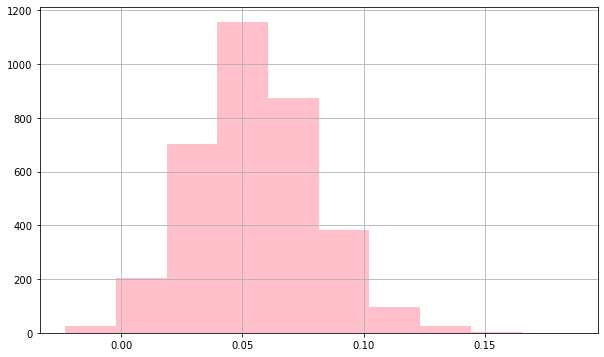

In [15]:
plt.figure(figsize = (10,6))
df_news['Polarity'].hist(color = 'pink')

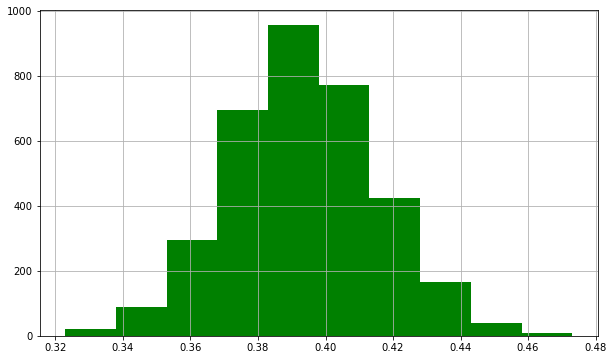

In [16]:
plt.figure(figsize = (10,6))
df_news['Subjectivity'].hist(color = 'green')

### Adding Sentiment Scores to df_news

In [17]:
sia = SentimentIntensityAnalyzer()

df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['headline_text']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['headline_text']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['headline_text']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['headline_text']]
df_news

<ipython-input-17-9fb92a98a7a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['headline_text']]
<ipython-input-17-9fb92a98a7a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['headline_text']]
<ipython-input-17-9fb92a98a7a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,headline_text,date,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,technology wishlist 2011 air passengers haras...,2011-01-02,0.420696,0.052225,-0.9999,0.195,0.696,0.109
1,photo gallery ( ashes 2010 ) guy needs compli...,2011-01-03,0.375598,0.061099,-0.9997,0.178,0.710,0.112
2,deepika padukone deepika padukone imran invit...,2011-01-04,0.391273,0.019847,-0.9998,0.174,0.717,0.108
3,man dies heart attack killing lover 's hubby ...,2011-01-05,0.420299,0.010189,-0.9999,0.189,0.701,0.109
4,photo gallery ( indian tour south africa ) ra...,2011-01-06,0.389732,0.020557,-0.9998,0.159,0.741,0.100
...,...,...,...,...,...,...,...,...
3463,containment zone residents slam high prices c...,2020-06-26,0.364023,0.043772,-0.9998,0.155,0.753,0.092
3464,like wont let toxic relationship food major r...,2020-06-27,0.381440,0.068239,-0.9998,0.148,0.759,0.093
3465,atanu ghosh plans rewrite old scripts make re...,2020-06-28,0.399849,0.037077,-0.9999,0.157,0.760,0.083
3466,6 hot stylish bikini looks katrina kaif anna ...,2020-06-29,0.378767,0.041490,-0.9998,0.152,0.760,0.088


## Numerical Analysis

Now we are going to analyze the historical stock price dataset

In [18]:
stock_df = pd.read_csv('BSESN.csv')
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,20621.609375,20664.800781,20531.000000,20561.050781,20561.050781,12000.0
1,2011-01-04,20617.380859,20651.210938,20449.009766,20498.720703,20498.720703,15200.0
2,2011-01-05,20509.949219,20509.949219,20243.949219,20301.099609,20301.099609,14400.0
3,2011-01-06,20395.500000,20425.849609,20107.169922,20184.740234,20184.740234,16600.0
4,2011-01-07,20163.849609,20210.619141,19629.220703,19691.810547,19691.810547,15800.0


In [19]:
# General info
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2455 non-null   object 
 1   Open       2438 non-null   float64
 2   High       2438 non-null   float64
 3   Low        2438 non-null   float64
 4   Close      2438 non-null   float64
 5   Adj Close  2438 non-null   float64
 6   Volume     2438 non-null   float64
dtypes: float64(6), object(1)
memory usage: 134.4+ KB


In [20]:
# Summary Stats
stock_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2.438000e+03
mean,27534.990383,27672.280174,27340.152603,27499.768572,27499.768572,1.439943e+05
std,7700.982133,7722.415079,7653.057429,7687.470434,7687.470434,1.513235e+06
min,15436.120117,15440.099609,15135.860352,15175.080078,15175.080078,2.500000e+03
25%,19723.430176,19820.339844,19621.708008,19698.077149,19698.077149,9.500000e+03
50%,27251.379883,27389.254882,27123.465820,27249.129882,27249.129882,1.200000e+04
75%,34203.609375,34456.069336,33999.981445,34190.496094,34190.496094,1.687500e+04
max,45999.421875,46164.101563,45792.011719,46103.500000,46103.500000,3.181510e+07


In [21]:
# Dropping null values
stock_df = stock_df.dropna() 

In [22]:
stock_df['date'] = pd.to_datetime(stock_df['Date'], infer_datetime_format=True)
stock_df = stock_df.drop('Date', axis=1)

Text(0.5, 1.0, 'SENSEX')

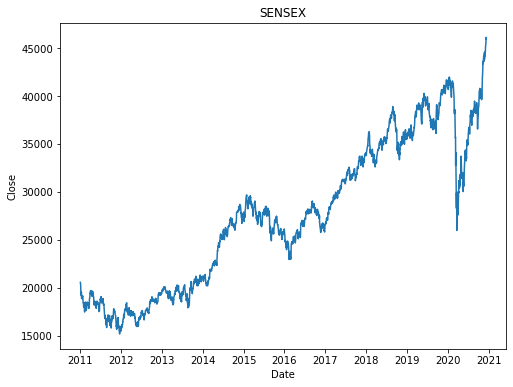

In [23]:
# Let's see a historical view of the closing price
plt.figure(figsize=(8, 6))
plt.plot( stock_df['date'],stock_df['Close'])
plt.ylabel('Close')
plt.xlabel('Date')
plt.title("SENSEX")

Text(0.5, 1.0, 'SENSEX')

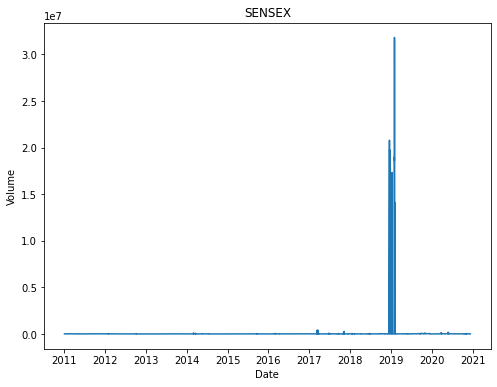

In [24]:
# Let's see a historical view of total Volume being traded everyday
plt.figure(figsize=(8, 6))
plt.plot( stock_df['date'],stock_df['Volume'])
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title("SENSEX")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002360270CAF0>,
      dtype=object)

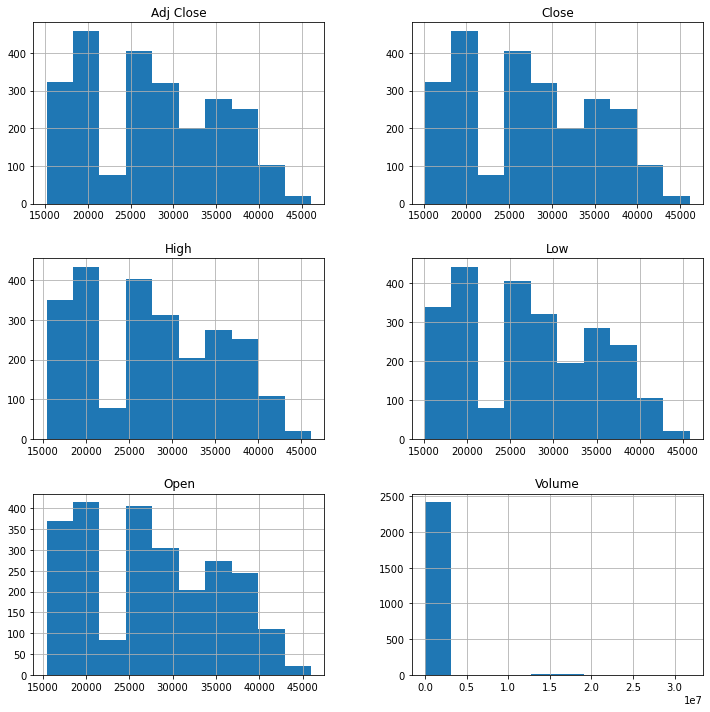

In [25]:
stock_df.hist(figsize=(12,12))

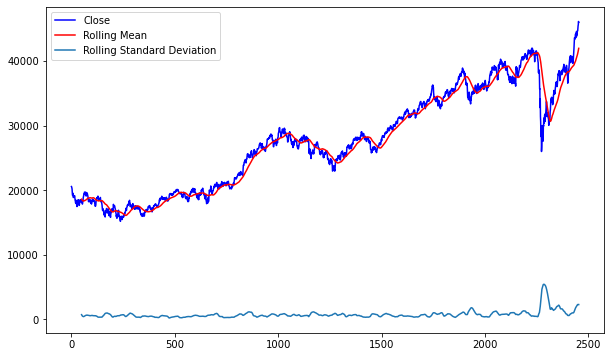

In [26]:
#Plotting moving average
close = stock_df['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
stock_df['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

### Cheking Daily return
We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock

Text(0.5, 1.0, 'SENSEX')

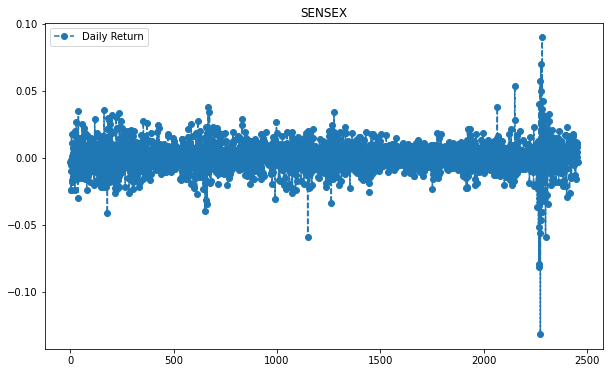

In [27]:
# We'll use pct_change to find the percent change for each day
stock_df['Daily Return'] = stock_df['Close'].pct_change()
plt.figure(figsize=(10, 6))
stock_df['Daily Return'].plot( legend=True, linestyle='--', marker='o')
plt.title("SENSEX")

Text(0.5, 1.0, 'SENSEX')

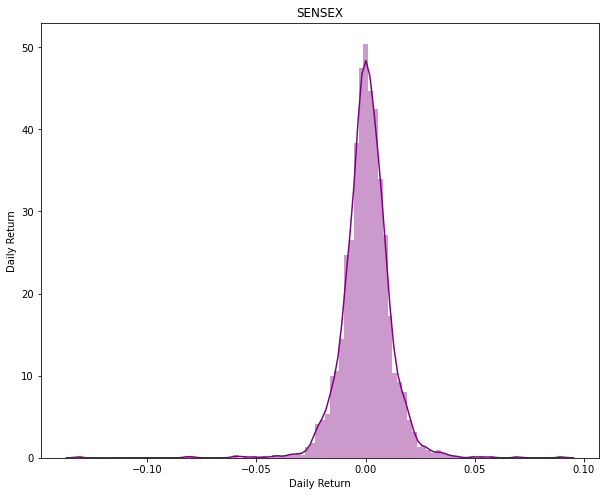

In [28]:
plt.figure(figsize=(10,8))
sns.distplot(stock_df['Daily Return'].dropna(), bins=100, color='purple')
plt.ylabel('Daily Return')
plt.title("SENSEX")

In [149]:
# Checking the moving avergae of SENSEX stock price for 10, 20 and 50 days
MA_day = [10, 20, 50]

for ma in MA_day:
    column_name = f"MA for {ma} days"
    stock_df[column_name] = stock_df['Adj Close'].rolling(ma).mean()

Text(0.5, 1.0, 'SENSEX')

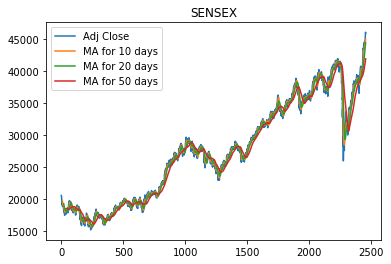

In [152]:
stock_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title('SENSEX')

## Merging Stock DataFrame and News Analysis DataFrame  

In [153]:
df_merge = pd.merge(stock_df, df_news, how='inner', on='date')
df_merge.head()

,Open,High,Low,Close,Adj Close,Volume,date,Daily Return,MA for 10 days,MA for 20 days,MA for 50 days,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,20621.609375,20664.800781,20531.000000,20561.050781,20561.050781,12000.0,2011-01-03,NaN,NaN,NaN,NaN,photo gallery ( ashes 2010 ) guy needs compli...,0.375598,0.061099,-0.9997,0.178,0.710,0.112
1,20617.380859,20651.210938,20449.009766,20498.720703,20498.720703,15200.0,2011-01-04,-0.003031,NaN,NaN,NaN,deepika padukone deepika padukone imran invit...,0.391273,0.019847,-0.9998,0.174,0.717,0.108
2,20509.949219,20509.949219,20243.949219,20301.099609,20301.099609,14400.0,2011-01-05,-0.009641,NaN,NaN,NaN,man dies heart attack killing lover 's hubby ...,0.420299,0.010189,-0.9999,0.189,0.701,0.109
3,20395.500000,20425.849609,20107.169922,20184.740234,20184.740234,16600.0,2011-01-06,-0.005732,NaN,NaN,NaN,photo gallery ( indian tour south africa ) ra...,0.389732,0.020557,-0.9998,0.159,0.741,0.100
4,20163.849609,20210.619141,19629.220703,19691.810547,19691.810547,15800.0,2011-01-07,-0.024421,NaN,NaN,NaN,rishi gives look test kjo tom hanks honoured ...,0.393698,0.017528,-0.9996,0.148,0.749,0.103


### Getting the dataframe on which we are going to predict stock price

In [156]:
 dataframe = df_merge.drop(["headline_text", "Daily Return", "Adj Close","High", "Low", "Volume", "date", "MA for 10 days", "MA for 20 days", "MA for 50 days"], axis=1)
dataframe

,Open,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,20621.609375,20561.050781,0.375598,0.061099,-0.9997,0.178,0.710,0.112
1,20617.380859,20498.720703,0.391273,0.019847,-0.9998,0.174,0.717,0.108
2,20509.949219,20301.099609,0.420299,0.010189,-0.9999,0.189,0.701,0.109
3,20395.500000,20184.740234,0.389732,0.020557,-0.9998,0.159,0.741,0.100
4,20163.849609,19691.810547,0.393698,0.017528,-0.9996,0.148,0.749,0.103
...,...,...,...,...,...,...,...,...
2319,35679.738281,34868.980469,0.380778,0.069655,-0.9997,0.137,0.778,0.085
2320,34525.390625,34842.101563,0.388167,0.003321,-0.9999,0.164,0.763,0.073
2321,35144.781250,35171.269531,0.364023,0.043772,-0.9998,0.155,0.753,0.092
2322,34926.949219,34961.519531,0.378767,0.041490,-0.9998,0.152,0.760,0.088


In [157]:
## Checking the co-relationship between features in dataframe
dataframe.corr()

,Open,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
Open,1.000000,0.999390,-0.042627,-0.166843,-0.001805,-0.090798,0.389565,-0.342634
Close,0.999390,1.000000,-0.042623,-0.166805,-0.000897,-0.091328,0.389814,-0.342288
Subjectivity,-0.042627,-0.042623,1.000000,0.265859,0.077157,-0.155557,-0.113988,0.308168
Polarity,-0.166843,-0.166805,0.265859,1.000000,0.252155,-0.437264,-0.097168,0.613236
Compound,-0.001805,-0.000897,0.077157,0.252155,1.000000,-0.312757,0.010020,0.348599
Negative,-0.090798,-0.091328,-0.155557,-0.437264,-0.312757,1.000000,-0.618842,-0.440472
Neutral,0.389565,0.389814,-0.113988,-0.097168,0.010020,-0.618842,1.000000,-0.432004
Positive,-0.342634,-0.342288,0.308168,0.613236,0.348599,-0.440472,-0.432004,1.000000


### Data Preprocessing

In [158]:
def preprocess_data(dataframe):
    sc = MinMaxScaler()
    new_df = pd.DataFrame(sc.fit_transform(dataframe))
    new_df.columns = dataframe.columns
    new_df.index = dataframe.index
    return new_df

In [159]:
new_df = preprocess_data(dataframe)

### Splitting our dataframe into train and test for predictions

In [160]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop("Close", axis=1), new_df["Close"], test_size=0.2)

In [161]:
X_train.shape, y_train.shape

((1859, 7), (1859,))

### Creating Custom Evaluation Function

In [162]:
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE:" : mean_absolute_error(y_train, train_preds),
             "Testing MAE:" : mean_absolute_error(y_test,test_preds),
             "Training MSE: ": mean_squared_error(y_train, train_preds),
             "Testing MSE:" : mean_squared_error(y_test,test_preds),
             "Training R^2:" : r2_score(y_train,train_preds),
             "Testing R^2:" : r2_score(y_test,test_preds)}
    
    return scores

In [163]:
# Function to predict and show the dataframe displaying first ten actual closing price and predicted closing price 
def predict_and_show(model,X_test):
    pred = model.predict(X_test)
    dataframe = pd.DataFrame({"Close": y_test[:10], "Predictions": pred[:10]})
    return dataframe

### Training Using Linear Regression Model

In [164]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [165]:
show_scores(lr)

{'Training MAE:': 0.00652492350394574,
 'Testing MAE:': 0.006375913150781332,
 'Training MSE: ': 9.340249245910667e-05,
 'Testing MSE:': 8.578591806423822e-05,
 'Training R^2:': 0.9987597912418218,
 'Testing R^2:': 0.9988611247812792}

In [166]:
predict_and_show(lr, X_test)

,Close,Predictions
1587,0.589418,0.596328
1685,0.669656,0.657476
1815,0.746536,0.741118
1172,0.441977,0.433909
1691,0.691033,0.688531
1744,0.703226,0.701186
1650,0.613375,0.614694
1418,0.483792,0.478769
1783,0.700787,0.699923
715,0.200161,0.199321


### Training and Predicting using  Random Forest Regressor

In [145]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_predictions=rf.predict(X_test)

In [146]:
## Getting evaluation scores on decision tree regressor
show_scores(rf)

{'Training MAE:': 0.002695867873584748,
 'Testing MAE:': 0.0074071446820428224,
 'Training MSE: ': 1.526501004356501e-05,
 'Testing MSE:': 0.0001197159928632005,
 'Training R^2:': 0.9997961406673673,
 'Testing R^2:': 0.9984423786151942}

In [147]:
predict_and_show(rf, X_test)

,Close,Predictions
196,0.069088,0.072432
151,0.062845,0.050845
2152,0.874759,0.888887
863,0.402837,0.397379
1032,0.484982,0.483046
587,0.168023,0.180180
2063,0.930199,0.945227
631,0.183572,0.184841
986,0.454550,0.461380
501,0.173375,0.179216


### Training and Predicting using Decision Tree Regressor

In [129]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)


In [130]:
# Getting the evaluation scores on decision tree regressor
show_scores(dt)

{'Training MAE:': 0.0,
 'Testing MAE:': 0.009865703521673874,
 'Training MSE: ': 0.0,
 'Testing MSE:': 0.00024612121694119176,
 'Training R^2:': 1.0,
 'Testing R^2:': 0.9967977238329376}

In [131]:
predict_and_show(dt, X_test)

,Close,Predictions
196,0.069088,0.062162
151,0.062845,0.046493
2152,0.874759,0.887465
863,0.402837,0.383847
1032,0.484982,0.481629
587,0.168023,0.188229
2063,0.930199,0.940502
631,0.183572,0.185781
986,0.454550,0.473932
501,0.173375,0.174817


### Training and Predicting using Ada Boost Regressor

In [132]:
ab = AdaBoostRegressor()
ab.fit(X_train, y_train)

AdaBoostRegressor()

In [133]:
# Getting the evaluations scores on ada boost regressor
show_scores(ab)

{'Training MAE:': 0.012330730431393934,
 'Testing MAE:': 0.012866322604058742,
 'Training MSE: ': 0.00025835156933698097,
 'Testing MSE:': 0.00030725655832627286,
 'Training R^2:': 0.9965497973234648,
 'Testing R^2:': 0.9960022936416046}

In [134]:
predict_and_show(ab, X_test)

,Close,Predictions
196,0.069088,0.074018
151,0.062845,0.048117
2152,0.874759,0.890058
863,0.402837,0.398852
1032,0.484982,0.491627
587,0.168023,0.165948
2063,0.930199,0.937217
631,0.183572,0.165948
986,0.454550,0.449557
501,0.173375,0.165948


#### We can see from the above model predictions that LinearRegression model has best r2_score and by showing the Actual Close price and our models predicted Close price, it shows that our model fit perfectly to the data.
